# Practical motivation

According to the World Health Organization, the world’s biggest killer is ischaemic heart disease, responsible for 16% of the world’s total deaths. Since 2000, the largest increase in deaths has been for this disease, rising by more than 2 million to 8.9 million deaths in 2019. Stroke and chronic obstructive pulmonary disease are the 2nd and 3rd leading causes of death, responsible for approximately 11% and 6% of total deaths respectively.



![Leading causes of death globally](img/death_infographic.png)


# Problem definition
# TO DO
To see if heart disease causes stroke(and vice versa)

To see how to reduce the factors leading to heart disease and stroke 

to find how people can stay healthier by reducing the risks of getting deadly diseases


# TO DO

Hence our problem will be a classification problem.

### Importing python libraries/data

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [2]:
data = pd.read_csv("cardio.csv", sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# Cleaning of data

The dataset contains information about patients doing cardiovascular disease examination.

From the data, we see that there are no null values

The description of the columns are as follows:

Column | Description | Info
:-|:-|:-
id| Patient ID number    
age| Age of the patient |(in days)   
gender| Gender of the patient| (1 - women, 2 - men)     
height| Height of the patient| (in cm)        
ap_hi| Systolic blood pressure      
ap_lo| Diastolic blood pressure     
cholesterol| cholestrol category| (1: normal, 2: above normal, 3: well above normal)       
gluc| glucose category| (1: normal, 2: above normal, 3: well above normal)      
smoke| Whether patient smoke| (0: Non-smoker, 1: Smoker)   
alco| Whether patient drinks alcohol| (0: Non-drinker, 1: Drinker)    
active| Whether patient is active in exercising| (0: Non-active, 1: Active) 
cardio| Presence/Absence of cardiovascular disase| (0: Absence, 1: Presence)

In [4]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Observations
With 70000 data points, the dataset has a sufficient number of data points. Generally the dataset looks fine.

However, there still a few of issues with the dataset:

* min and max height values may be unrealistic
    * 55cm and 250cm
* min and max weight values may be unrealistic
    * 10kg and 200kg
* Systolic blood pressure(ap_hi) and Diastolic blood pressure(ap_lo) have negative values (not possible) and unrealisticly high max values.
    * Normal Systolic blood pressure(ap_hi) should be around 120 
        *  However it is between 150mmHg and 16020mmHg
    * Normal Diastolic blood pressure(ap_lo) should be around 80
        *  However it is between 70mmHg and 11000mmHg



### Other steps 
In order to match the variables in the cardio dataset with our stroke dataset subsequently, we must also do the following:

* Convert age from days to years
* Combine height and weight into a new BMI column
* Combine ap_hi and ap_lo into a new hypertension column
* Drop columns that will not be used




---
### Removing outliers from height, weight, ap_hi, ap_lo columns

We assume that 5% of the dataset are outliers, and remove the entries that lie in the top 2.5% and bottom 2.5%, this will remove the unrealistic min and max values as well

Note: We will not consider outliers for age, as min age = 10798 days = 29 years, while max age = 23713 days = 64 years, which are realistic values

In [5]:
height_outliers = data[(data['height'] > data['height'].quantile(0.975)) | 
                  (data['height'] < data['height'].quantile(0.025))].index

weight_outliers = data[(data['weight'] > data['weight'].quantile(0.975)) | 
                  (data['weight'] < data['weight'].quantile(0.025))].index

aphi_outliers   = data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | 
                  (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index

aplo_outliers   = data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | 
                  (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index

In [6]:
toremove = set(list(height_outliers) + list(weight_outliers) + list(aphi_outliers) + list(aplo_outliers))
len(toremove)

8906

In [7]:
data.drop(toremove, inplace=True)

In [8]:
# Check that the min and max values of the columns have changed
# New total count should be 70000 - 8906 = 61094

data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000
mean,49885.960536,19476.633041,1.347334,164.538645,73.515243,126.149736,81.148558,1.354356,1.220807,0.085868,0.052231,0.803500,0.491685
std,28846.600883,2459.569651,0.476127,6.843466,11.847502,14.302501,8.325156,0.672474,0.567816,0.280171,0.222494,0.397355,0.499935
min,0.000000,10798.000000,1.000000,150.000000,51.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24853.250000,17692.250000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49887.500000,19708.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74738.500000,21327.000000,2.000000,169.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,180.000000,108.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


--- 
### Removing invalid ap_lo and ap_hi entries
Even though we already removed the outliers, we still need to check for all the entries that the systolic blood pressure (ap_hi) cannot be lower than the diastolic blood pressure (ap_lo)

In [9]:
invalid = data[(data['ap_hi'] < data['ap_lo'])].index
invalid

Int64Index([], dtype='int64')

We see that by removing the outliers, the invalid entries have also been removed as well. No need for additional work to be done

---

Next, we perform the additional steps in order to match our stroke dataset

### To convert age columns from days to years

In [10]:
data['age'] = data['age'].apply(lambda x: x//365)

In [11]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000
mean,49885.960536,52.861656,1.347334,164.538645,73.515243,126.149736,81.148558,1.354356,1.220807,0.085868,0.052231,0.803500,0.491685
std,28846.600883,6.745516,0.476127,6.843466,11.847502,14.302501,8.325156,0.672474,0.567816,0.280171,0.222494,0.397355,0.499935
min,0.000000,29.000000,1.000000,150.000000,51.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24853.250000,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49887.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74738.500000,58.000000,2.000000,169.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,180.000000,108.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


---

### Combining height and weight into a single BMI column
In reality, BMI is another good indicator to determine how healthy an individual is. A normal healthy BMI should have a range of 18.5 to 25.

Formula for BMI = mass in kg / (height in m) ** 2 

In [12]:
data["bmi"] = data.apply(lambda x: x["weight"] / ((x["height"]/100)*(x["height"]/100) ), axis=1)

In [13]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000
mean,49885.960536,52.861656,1.347334,164.538645,73.515243,126.149736,81.148558,1.354356,1.220807,0.085868,0.052231,0.803500,0.491685,27.206710
std,28846.600883,6.745516,0.476127,6.843466,11.847502,14.302501,8.325156,0.672474,0.567816,0.280171,0.222494,0.397355,0.499935,4.478431
min,0.000000,29.000000,1.000000,150.000000,51.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.740741
25%,24853.250000,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,49887.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.259585
75%,74738.500000,58.000000,2.000000,169.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.760863
max,99999.000000,64.000000,2.000000,180.000000,108.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,48.000000


--- 
### Combining ap_hi and ap_lo into a single hypertension column
![title](img/hypertension.png)

We will use the above image as reference to determine whether the patient has hypertension.       

We notice that the values are being stored as integers, this could be due to the values being rounded when storing the values. Therefore, instead of comparing value >= threshold, we will instead compare value > threshold instead.

* Patients with a systolic blood pressure (ap_hi) > 130 will be considered as hypertension.    

* Patients with a diastolic blood pressure (ap_lo) > 80 will be considered as hypertension.      

In [14]:
data["hypertension"] = data.apply(lambda x: 1 if (x['ap_hi'] > 130 or x['ap_lo'] > 80) else 0, axis=1)

data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,hypertension
count,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000
mean,49885.960536,52.861656,1.347334,164.538645,73.515243,126.149736,81.148558,1.354356,1.220807,0.085868,0.052231,0.803500,0.491685,27.206710,0.338102
std,28846.600883,6.745516,0.476127,6.843466,11.847502,14.302501,8.325156,0.672474,0.567816,0.280171,0.222494,0.397355,0.499935,4.478431,0.473067
min,0.000000,29.000000,1.000000,150.000000,51.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.740741,0.000000
25%,24853.250000,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,0.000000
50%,49887.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.259585,0.000000
75%,74738.500000,58.000000,2.000000,169.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.760863,1.000000
max,99999.000000,64.000000,2.000000,180.000000,108.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,48.000000,1.000000


--- 
### Dropping unnecessary columns
Finally, we drop the id column as it is not needed in our model, height and weight columns since we already have a BMI column, ap_hi and ap_lo columns since we already have a hypertension column. 

Additionally, our stroke dataset does not contain cholesterol, alcohol or active variables, hence we will be dropping them as well.

In [15]:
for i in ['id', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'alco', 'active']:
    data.drop([i], axis='columns', inplace=True)

data.describe()

,age,gender,gluc,smoke,cardio,bmi,hypertension
count,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000
mean,52.861656,1.347334,1.220807,0.085868,0.491685,27.206710,0.338102
std,6.745516,0.476127,0.567816,0.280171,0.499935,4.478431,0.473067
min,29.000000,1.000000,1.000000,0.000000,0.000000,15.740741,0.000000
25%,48.000000,1.000000,1.000000,0.000000,0.000000,23.875115,0.000000
50%,53.000000,1.000000,1.000000,0.000000,0.000000,26.259585,0.000000
75%,58.000000,2.000000,1.000000,0.000000,1.000000,29.760863,1.000000
max,64.000000,2.000000,3.000000,1.000000,1.000000,48.000000,1.000000


### Encoding categorical variables

In [16]:
#Encoding the Gender variable

genders = pd.get_dummies(data.gender)
genders.rename(columns={1: "female", 2: "male"}, inplace=True)


#Concat to our original dataframe
data = pd.concat([data, genders], axis=1)
data = data.drop(["gender"], axis=1)

In [17]:
for i in ['gluc', 'smoke', 'cardio', 'hypertension', 'female', 'male']:
    data[i] = data[i].astype("category")

data.describe()

,age,bmi
count,61094.000000,61094.000000
mean,52.861656,27.206710
std,6.745516,4.478431
min,29.000000,15.740741
25%,48.000000,23.875115
50%,53.000000,26.259585
75%,58.000000,29.760863
max,64.000000,48.000000


In [18]:
cardio = data.copy()

%store cardio

Stored 'cardio' (DataFrame)


This will be the cleaned dataset used for our subsequent models

---
### Visualising the new dataset

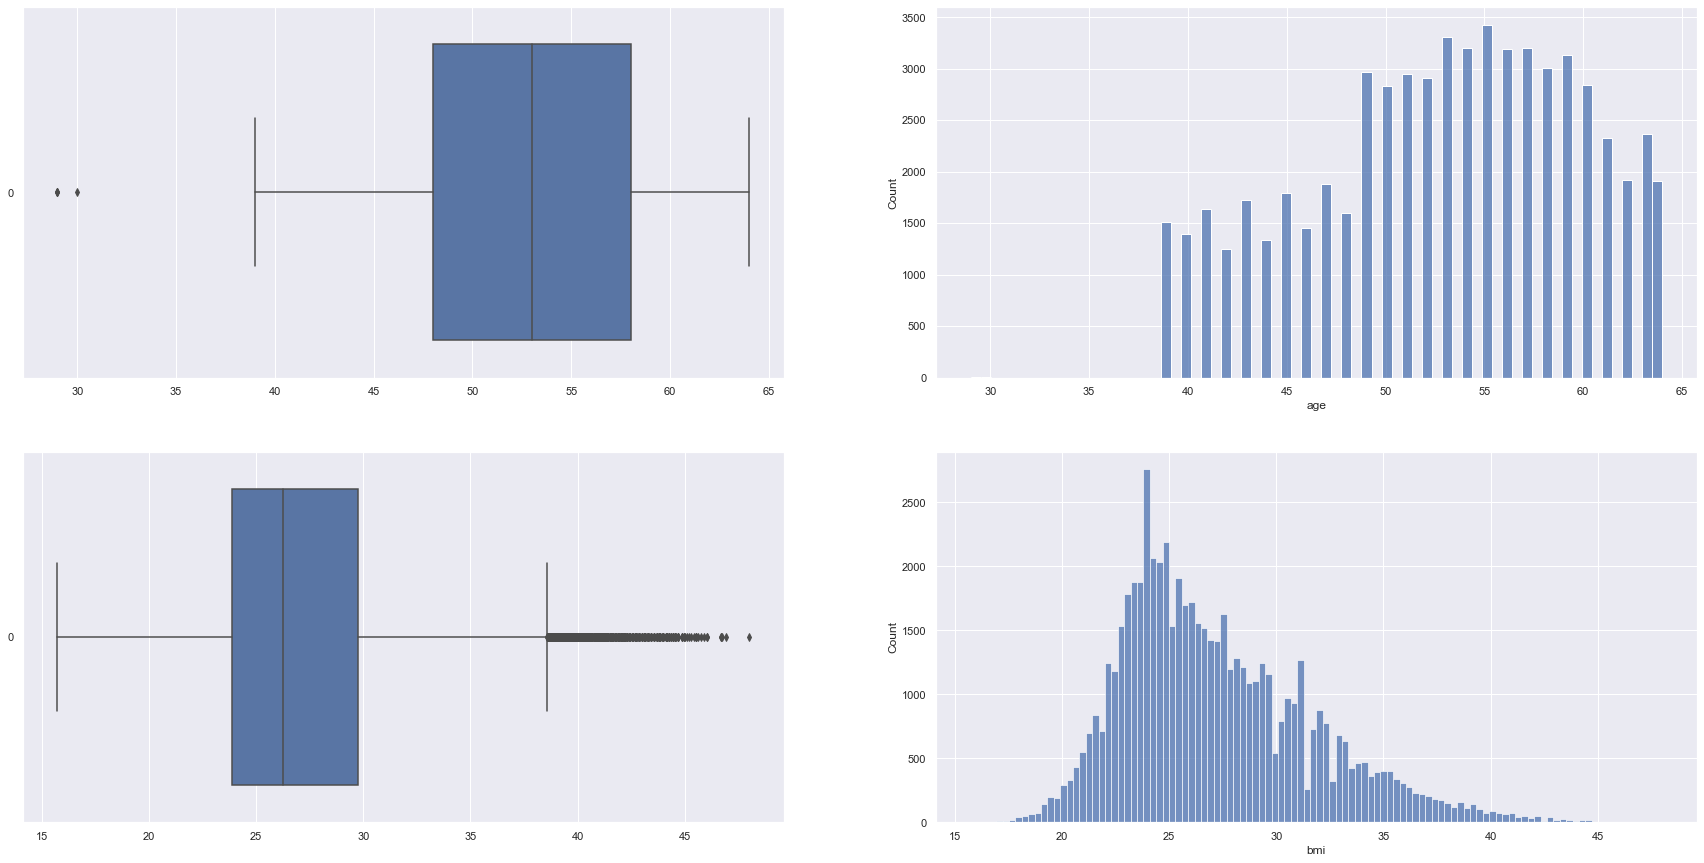

In [19]:
#Visualing the numeric variables
f,axes = plt.subplots(2, 2, figsize=(30, 15))

for i,val in enumerate(["age", "bmi"]):
    sb.boxplot(data = data[val], orient = "h", ax = axes[i][0])
    sb.histplot(data = data[val], ax = axes[i][1])

### Observations:
#### Age:
* Most of the values lie between 39 to 64 years old with two outliers 29 and 30. 
* Lower quartile value = 48 
* Median = 53 
* Upper quartile value = 58 
* Most of the data are aged 55 years old 

#### BMI:
* Most of the values lie between 16 to 38. Despite cleaning the data there were still many outliers from 38 onwards. 
* Lower quartile value = 24 
* Median = 26 
* Upper quartile value = 28 
* The healthy bmi range is 18.5—24.9
* Most of the data have a bmi of about 24, which is within the healthy range
* However, most of the patients have a BMI above 24, suggesting that a lot of these patients are overweight

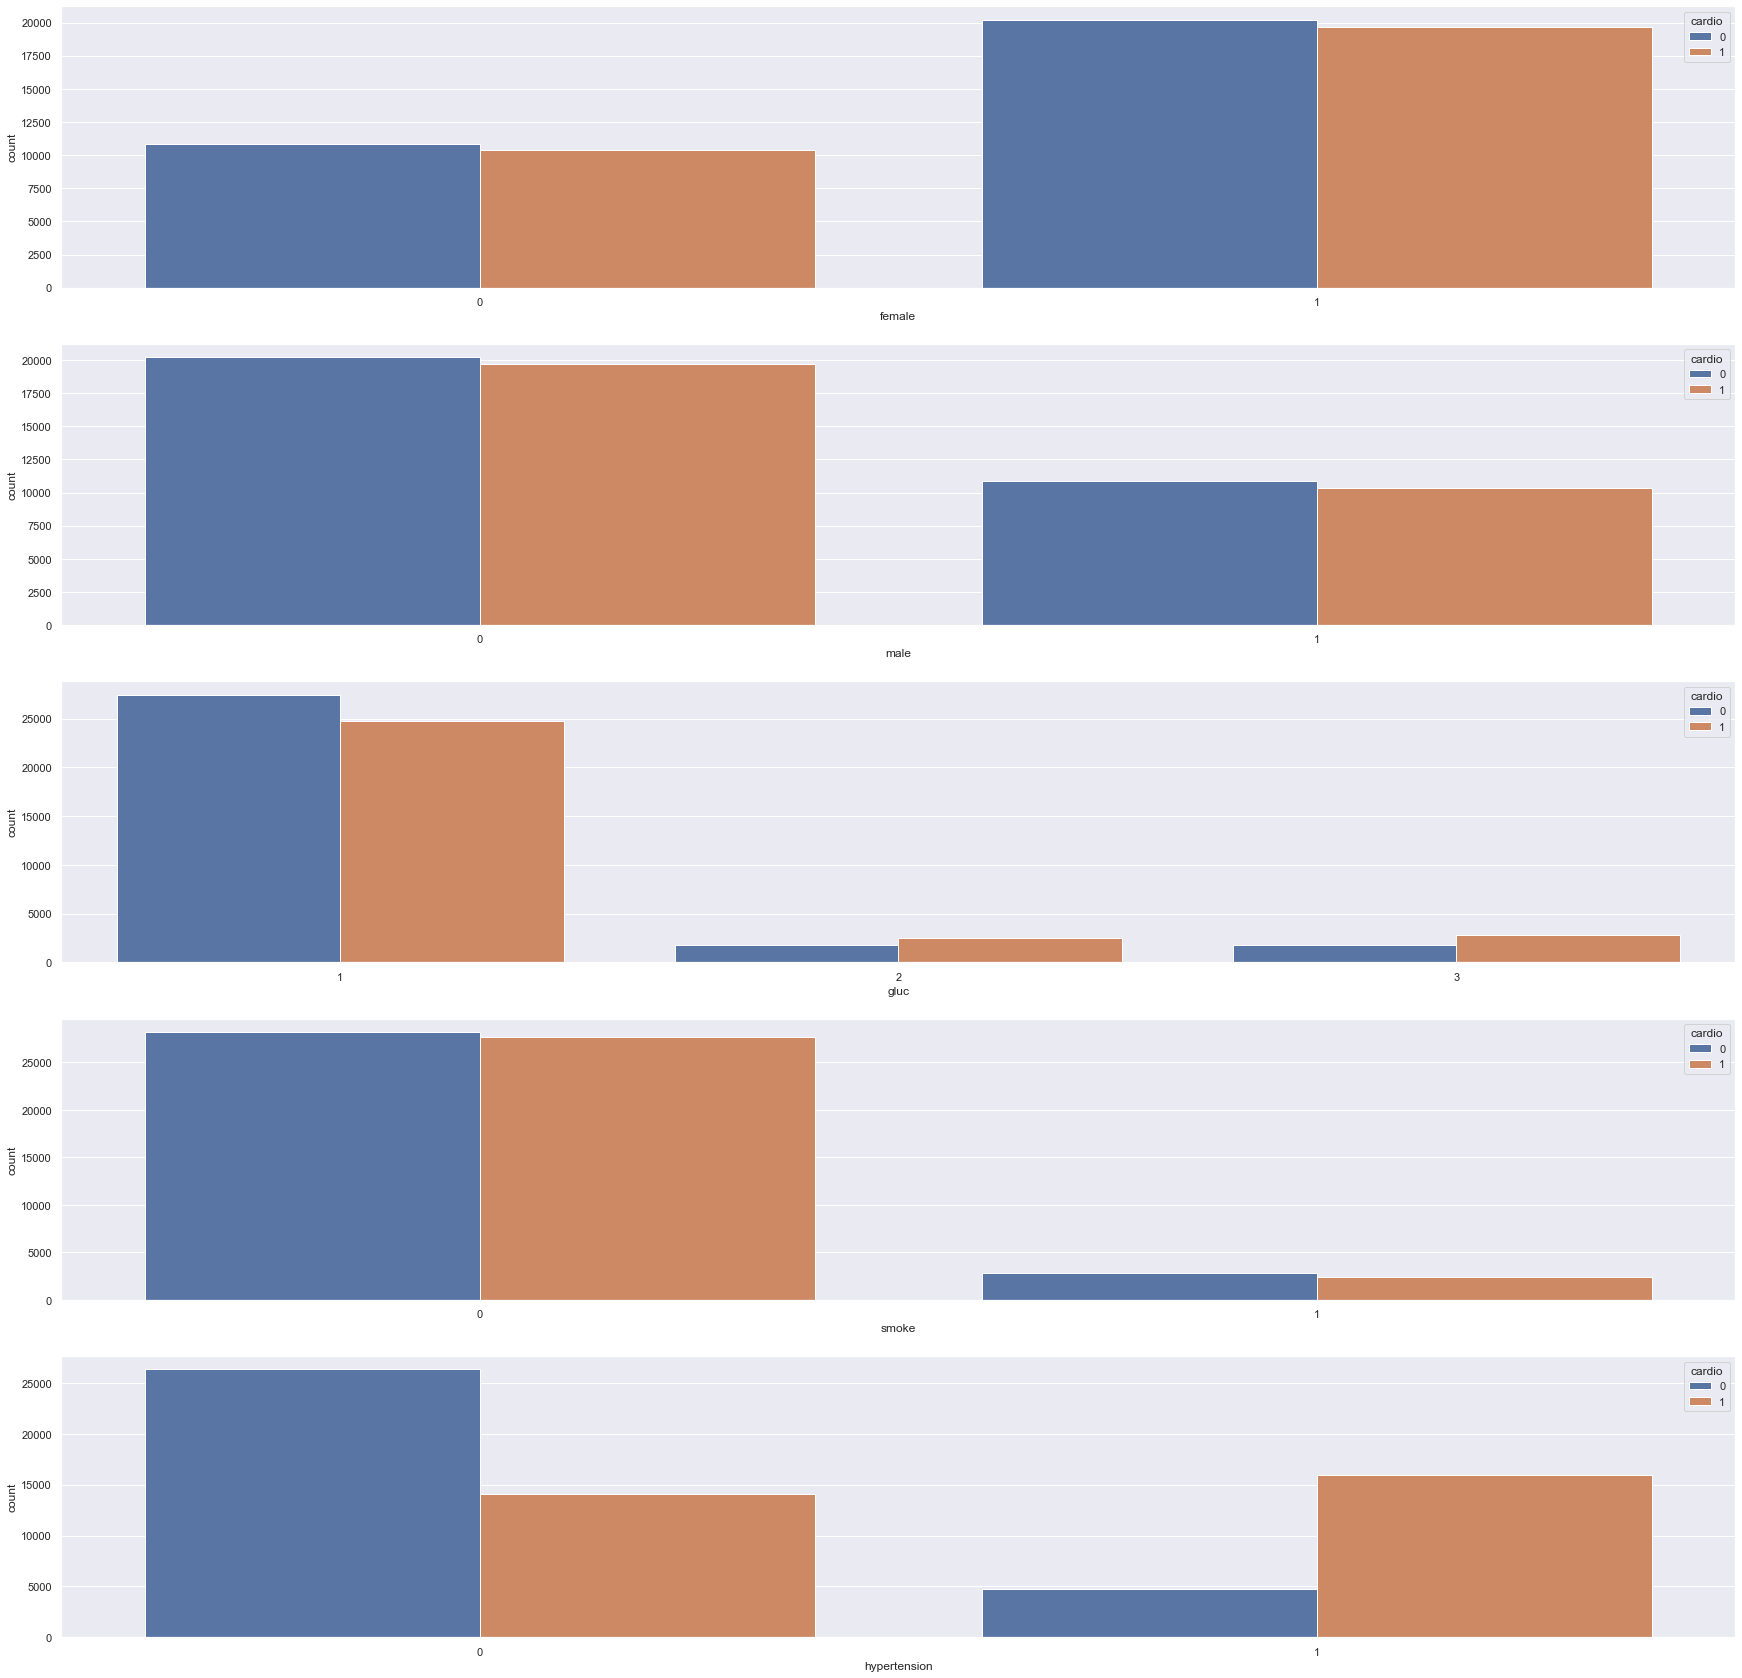

In [20]:
#Visualising the categorical variables with target variable
f ,axes = plt.subplots(5, 1, figsize=(30, 30))

for i,val in enumerate(["female", "male", "gluc", "smoke", "hypertension"]):
    sb.countplot(x=val, hue="cardio", data=data, ax=axes[i]);

### Observations:
#### Gender
* Number of females in the data is higher than the number of males 
* The number of females that have heart disease to the ones that does not have is almost simmilar with both values of around 20000
* The number of males that have heart disease to the ones that does not have are also similar where both varies around 10000

#### Glucose
* From the glucose chart, we can see that majority of the people have a normal glucose level which is labeled as 1. There are more people that do not have heart disease compared to people who have heart disease for normal glucose level but only by a small amount. 
* People that have a glucose level that are above normal and well above normal which are labeled as 2 and 3 respectively have a higher rate of having heart disease.

#### Smoke
* There are more non smokers as compared to smokers in the data
* From the chart, it does not seem that smoking affects heart disease

#### Hypertension
* From the graph above, it is obvious that people without hypertension are more unlikely to have heart disease while people who has hypertension is most likely to get heart disease









# Machine Learning

We will use machine learning to learn from the data, and to get the best model for our data set. Since this is a classification problem, we will be using supervised machine learning models.

We will try to choose models that generally performs better with classification problems, for a medium sized dataset, with a small number of dimensions. However, no single algorithm dominates when choosing a machine learning model. Some perform better with large data sets and some perform better with high dimensional data. Hence, we will have a training and test dataset for each of the models. Afterwards, we will pick the model with the best accuracy.

---
## Model 1: Decision Tree Classification

A Decision Tree is a supervised Machine learning algorithm. It is used in both classification and regression algorithms. The decision tree is like a tree with nodes. The branches depend on a number of factors. It splits data into branches like these till it achieves a threshold value. A decision tree consists of the root nodes, children nodes, and leaf nodes.



### Advantages

- Simple to implement

*We have done this during our lab sessions. Hence we are familiar with how desicion trees work. It is also easy for us to implement*

---

- Impressive in Versatility

*It can be used for both regression and classification problems*

---

- Quick Prediction/Training Speed

*This is a simple machine learning project. We do not want the machine learning task to take a long time to compute*

### Disadvantages

- Easily overfit 

*Decision tree learners can create over-complex trees that do not generalise the data well. However, this can still be solved by pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth*


---

- Unstable

*Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. However, this problem is mitigated by using decision trees within an ensemble.*

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [22]:
X = data.drop("cardio", axis=1)
y = data.cardio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4294967295)

In [23]:
tree = DecisionTreeClassifier(max_depth = 4)  
tree.fit(X_train, y_train)                    

DecisionTreeClassifier(max_depth=4)

In [35]:
def visualize_performance(y_train, y_train_pred, y_test, y_test_pred):
    """
    Creates a confusion matrix visualization for train and test set
    using heatmap with added information such as:
        - Accuracy
        - Precision
        - Recall
        - F1 score
        
    Returns the accuracy, precision, recall, and F1 score from test set.
    """
    
    f, ax = plt.subplots(ncols=2, figsize=(14, 4))
    f.suptitle('Training vs Test Performance', fontweight='bold', fontsize='x-large')
    
    # Training set
    cf_train = confusion_matrix(y_train, y_train_pred)
    sb.heatmap(cf_train, fmt='.0f', annot=True, ax=ax[0])
    
    # Calculate metrics
    accuracy_train = np.trace(cf_train) / float(np.sum(cf_train))
    precision_train = cf_train[1,1] / sum(cf_train[:,1])
    recall_train = cf_train[1,1] / sum(cf_train[1,:])
    f1_score_train = 2 * precision_train * recall_train / (precision_train + recall_train)
    
    stats_text_train = "\n\nAccuracy={:0.5f}\nPrecision={:0.5f}\nRecall={:0.5f}\nF1 Score={:0.5f}".format(
        accuracy_train, precision_train, recall_train, f1_score_train)
    
    ax[0].set(xlabel='Predicted' + stats_text_train, 
              ylabel='Actual', title='Training Performance')
    
    # Test set
    cf_test = confusion_matrix(y_test, y_test_pred)
    sb.heatmap(cf_test, fmt='.0f', annot=True, ax=ax[1])
    
    # Calculate metrics
    accuracy_test = np.trace(cf_test) / float(np.sum(cf_test))
    precision_test = cf_test[1,1] / sum(cf_test[:,1])
    recall_test = cf_test[1,1] / sum(cf_test[1,:])
    f1_score_test = 2 * precision_test * recall_test / (precision_test + recall_test)
    
    stats_text_test = "\n\nAccuracy={:0.5f}\nPrecision={:0.5f}\nRecall={:0.5f}\nF1 Score={:0.5f}".format(
        accuracy_test, precision_test, recall_test, f1_score_test)
    
    ax[1].set(xlabel='Predicted' + stats_text_test, 
              ylabel='Actual', title='Test Performance')
    
    plt.show()
    
    return accuracy_test, precision_test, recall_test, f1_score_test

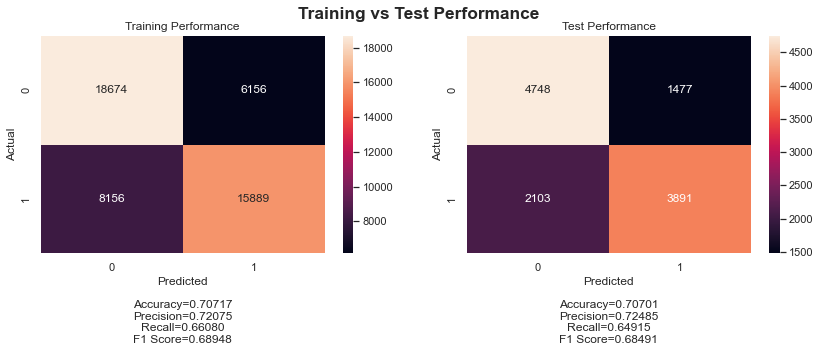

(0.707013667239545, 0.7248509687034277, 0.6491491491491491, 0.6849146277063898)

In [36]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

visualize_performance(y_train, y_train_pred, y_test, y_test_pred)

---

## Model 2: Random Forest

Random forest can be used for both classification and regression problems. This is suitable to our problem as we are doing a classification problem.

Random forests are bagged decision tree models that split on a subset of features on each split.

Random Forest take a random set of measures and a random sample of the training set and builds a decision tree. Then it does the same many times using a different random set of measurements and a random sample of data each time. This results in a wide diversity that generally results in a better model.

### Advantages

- Impressive in Versatility

*It can be used for both regression and classification problems*

---

- Reduced risk of overfitting

*Decision trees run the risk of overfitting as they tend to tightly fit all the samples within training data. However, when there’s a robust number of decision trees in a random forest, the classifier won’t overfit the model since the averaging of uncorrelated trees lowers the overall variance and prediction error..*

---

- Easy to determine feature importance

*Random forest makes it easy to evaluate variable importance, or contribution, to the model.*

---

- Low Bias, Moderate Variance

*Each decision tree has a high variance, but low bias. But because we average all the trees in random forest, we are averaging the variance as well so that we have a low bias and moderate variance model.*

### Disadvantages

- High memory usage for very large data sets.

*Our dataset only has 61094 data points with 5 dimensions, so it is only a medium sized dataset, and it will not have high memory usage*


---
- Time-consuming

*Our dataset is not very large and our max depth of the tree is only 6. Hence machine learning will still be fast*

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 200,  # n_estimators denote number of trees
                                 max_depth = 6)      # set the maximum depth of each tree

forest.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=6, n_estimators=200)

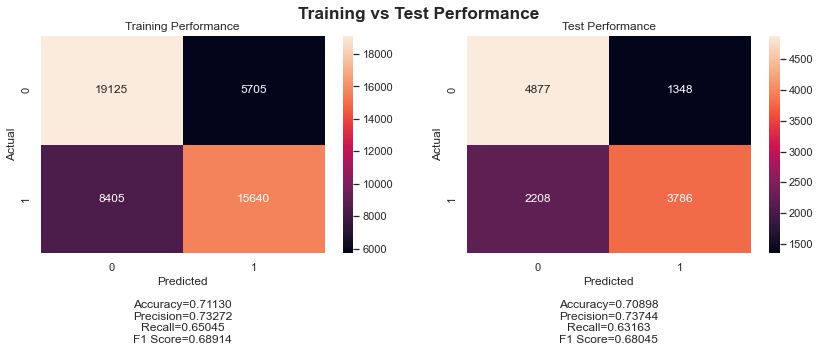

(0.7089778214256486,
 0.7374366965329178,
 0.6316316316316316,
 0.6804457225017972)

In [38]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

visualize_performance(y_train, y_train_pred, y_test, y_test_pred)

---

## Model 3: Logistic Regression

Logistic regression is a statistical method used to predict the outcome of a dependent variable based on previous observations. It takes a linear combination of features and applies a nonlinear function (sigmoid) to it, so it’s a tiny instance of the neural network. 

Logistic Regression is a type of regression analysis and is a commonly used algorithm for solving binary classification problems.

### Advantages

- Simple to understand, easy to implement, and efficient to train

---


- Less prone to overfitting in low dimensional datasets

*Our dataset has only 5 dimensions*

---


- Useful to find relationships between features

---

- Provides well-calibrated probabilities


 ### Disadvantages

- Can lead to overfitting if the number of features is more than the number of observations

*The dataset has more features than observations*

---

- Can be used only to predict discrete functions

*We are trying to solve a classfication problem, so we are not predicting continous functions*

---

- Sensitive to outliers

*We have already removed the outliers when we cleaned the data* 

---

- Can't solve non-linear problems

In [39]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=1000, solver='lbfgs', penalty='l2', C=10)

logr.fit(X_train, y_train.ravel())

LogisticRegression(C=10, max_iter=1000)

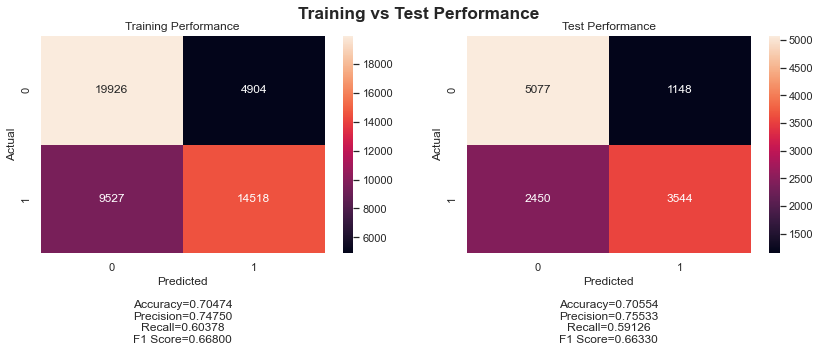

(0.7055405515999673,
 0.7553282182438192,
 0.5912579245912579,
 0.6632977727868239)

In [40]:
y_train_pred = logr.predict(X_train)
y_test_pred = logr.predict(X_test)

visualize_performance(y_train, y_train_pred, y_test, y_test_pred)

---

## Model 4: XGBoost

XGBoost stands for Extreme Gradient Boosting. It’s a parallelized and carefully optimized version of the gradient boosting algorithm. Instead of training the best possible model on the data (like in traditional methods), we train thousands of models on various subsets of the training dataset and then vote for the best-performing model.

### Advantages

- Regularization

*XGBoost includes different regularization penalties to avoid overfitting. Penalty regularizations produce successful training so the model can generalize adequately.*

---
- Fast execution speed

*Really fast when compared to other implementations of gradient boosting.*

---
- Good model Performance

*XGBoost dominates structured or tabular datasets on classification and regression predictive modeling problems. The evidence is that it is the go-to algorithm for competition winners on the Kaggle competitive data science platform.*

### Disadvantage

- Sensitive to outliers

*However, this is not a big issue as we have removed the outliers.*

---

- Slow to implement 

*However, it is still very fast for datasets that are not too large such as the cardio.csv dataset that we are using*

In [41]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_cl = xgb.XGBClassifier(
    tree_method = "gpu_hist", 
    enable_categorical = True, 
    use_label_encoder=False, 
    objective="binary:logistic", 
    disable_default_eval_metric=True
)

xgb_cl.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              disable_default_eval_metric=True, enable_categorical=True,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

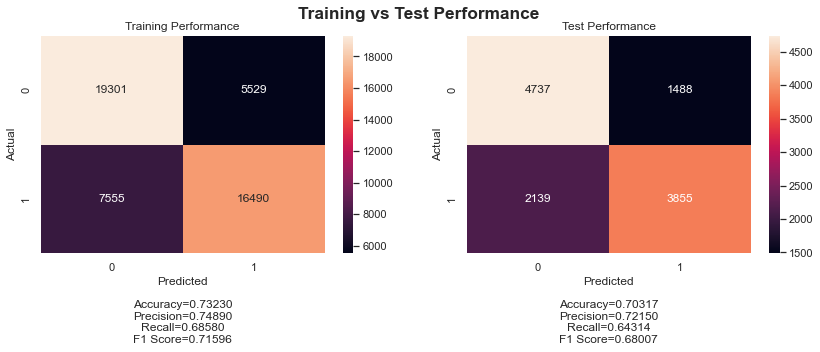

(0.703167198625092, 0.7215047725996631, 0.6431431431431431, 0.6800740936755755)

In [42]:
y_train_pred = xgb_cl.predict(X_train)
y_test_pred = xgb_cl.predict(X_test)

visualize_performance(y_train, y_train_pred, y_test, y_test_pred)

Accuracy is the ratio of correctly predicted observation over the total observations where the percentage is the accuracy of the model.
* Accuracy = TP+TN/TP+FP+FN+TN

Precision is the ratio of true positives over the total predicted positive observations made
* Precision = TP/TP+FP

Recall is the ratio of true positive values over all the positive values 
* Recall = TP/TP+FN

F1 score is the weighted average of precision and recall where it considers the false positive and false negatives. This method is more useful than accuracy when there is an uneven distribution.
* F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Joshi, R. (2016, November 11). _Accuracy, precision, Recall & F1 score: Interpretation of performance measures._ Exsilio Blog. Retrieved April 19, 2022, from https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/ 



### Observations:


Model 1: Binary Classification 
   
          | Accurracy  |  Precision  |   Recall     |  F1Score |
    ____________________________________________________________
     Train| 70.717%    |   72.075%   |   66.080%    | 68.948%  |
    ____________________________________________________________
     Test | 70.701%    |   70.701%   |   72.485%    | 68.491%  |
    ____________________________________________________________

Model 2: Random Forest

          | Accurracy  |  Precision  |   Recall     |  F1Score |
    ____________________________________________________________
     Train| 71.130%    |   73.272%   |   65.045%    | 68.914%  |
    ____________________________________________________________
     Test | 70.898%    |   73.744%   |   63.163%    | 68.045%  |
    ____________________________________________________________

Model 3: Logistic Regression

          | Accurracy  |  Precision  |   Recall     |  F1Score |
    ____________________________________________________________
     Train| 70.474%    |   74.750%   |   60.378%    | 66.800%  |
    ____________________________________________________________
     Test | 70.554%    |   75.533%   |   59.126%    | 66.330%  |
    ____________________________________________________________

Model 4: XGBoost

          | Accurracy  |  Precision  |   Recall     |  F1Score |
    ____________________________________________________________
     Train| 73.230%    |   74.890%   |   68.580%    | 71.596%  |
    ____________________________________________________________
     Test | 70.317%    |   72.150%   |   64.314%    | 68.007%  |
    ____________________________________________________________

#### Accurracy
Comparing the results above, we see the test data of the 4 models performed similarly at about 70% accuracy.
Comparing the train data, our 4th model XGBoost performed the best at 73.2%.
Thus XGBoost performed the best for the accurracy.

#### Precision
For Precision, the train data for XGBoost perfromed the best as compared to other models with an Precision score of 74.890% although Logistic Regression is very close with a score of 74.750%
For Precision test data, logistic regression perfromed the best with a score of 75.5%
Thus logistic regression performed the best for the precision.

#### Recall
For train data for recall, XGBoost performed the best with a score of 68.6% higher than binary classification by 2% with a score of 66.1%
For the test data, Binary classification has the highest recall score of 72.5% which is about 8% higher than the score for XGBoost which is the 2nd best for the test data. 
Thus Binary Classification perfromed the best for the Recall

#### F1 Score
For train data of F1 Score, XGBoost has the highest score of 71.6% compared to the other models with the scores ranging from about 67%~69%. 
For the test dataset, Binary Classification, Random Forest and XGBoost had the higher value of closely around 68%.
Thus XGBoost performed the best for the F1 Score

#### Best model to use
Therefore from the results we can say that XGBoost is the best choice for prediction as it the best model for 2 out of 4 of the classifiers. Although XGBoost was not the best for recall and precision, it was still the second best out of the other four for both of the classifiers.  

---

## Hyperparameter Tuning of XGBoost with GridSearchCV

Hyperparameter tuning is an essential part of controlling the behavior of a machine learning model. Doing so can ensure that our chosen model will produce the optimal results.

In [89]:
#Import libraries:
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid = {
    'learning_rate': [0.01],
    'n_estimators': range(100, 601, 100)
}

gsearch1 = GridSearchCV(estimator=xgb_cl, param_grid=param_grid, n_jobs=4, scoring = 'accuracy', cv = 4, verbose=3)
gsearch1.fit(X_train, y_train.ravel())

print('best score:/n', gsearch1.best_score_)
print('bestparams:/n' ,gsearch1.best_params_)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
best score:/n 0.7082557084771641
bestparams:/n {'learning_rate': 0.01, 'n_estimators': 500}


--- 

### Tune max_depth and min_child_weight
We tune these first as they will have the highest impact on model outcome

In [93]:
param_grid = {
    'learning_rate': [0.01],
    'n_estimators': [500],
    'max_depth': [3,4,5,6],
    'min_child_weight': [4,5,6]
}

gsearch2 = GridSearchCV(estimator=xgb_cl, param_grid=param_grid, n_jobs=4, scoring = 'accuracy', cv = 4, verbose=3)
gsearch2.fit(X_train, y_train.ravel())

print('best score:/n', gsearch2.best_score_)
print('bestparams:/n' ,gsearch2.best_params_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
best score:/n 0.7091968640167652
bestparams:/n {'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 500}


--- 

### Tune gamma

We will tune gamma value using the parameters already tuned above.

In [96]:
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [500],
    'max_depth': [4],
    'min_child_weight': [5],
    'gamma': [0.4, 0.45, 0.5, 0.55]
}

gsearch3 = GridSearchCV(estimator=xgb_cl, param_grid=param_grid, n_jobs=4, scoring = 'accuracy', cv = 4, verbose=3)
gsearch3.fit(X_train, y_train.ravel())

print('best score:/n', gsearch3.best_score_)
print('bestparams:/n' ,gsearch3.best_params_)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
best score:/n 0.7094423816154547
bestparams:/n {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 500}


--- 

### Tune subsample and colsample_bytree

In [97]:
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [500],
    'max_depth': [4],
    'min_child_weight': [5],
    'gamma': [0.5],
    'subsample':[0.80, 0.85, 0.90, 0.95],
    'colsample_bytree':[0.80, 0.85, 0.90, 0.95]
}

gsearch4 = GridSearchCV(estimator=xgb_cl, param_grid=param_grid, n_jobs=4, scoring = 'accuracy', cv = 4, verbose=3)
gsearch4.fit(X_train, y_train.ravel())

print('best score:/n', gsearch4.best_score_)
print('bestparams:/n' ,gsearch4.best_params_)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
best score:/n 0.7079487909652766
bestparams:/n {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.95}


---

### Tuning Regularization Parameters

In [98]:
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [500],
    'max_depth': [4],
    'min_child_weight': [5],
    'gamma': [0.5],
    'subsample':[0.95],
    'colsample_bytree':[0.8],
    'reg_lambda' : [0.9, 0.95, 1.0, 1.05],
    'reg_alpha':[0.09, 0.10, 0.11]
}

gsearch5 = GridSearchCV(estimator=xgb_cl, param_grid=param_grid, n_jobs=4, scoring = 'accuracy', cv = 4, verbose=3)
gsearch5.fit(X_train, y_train.ravel())

print('best score:/n', gsearch5.best_score_)
print('bestparams:/n' ,gsearch5.best_params_)


Fitting 4 folds for each of 12 candidates, totalling 48 fits
best score:/n 0.70874674702369
bestparams:/n {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 500, 'reg_alpha': 0.09, 'reg_lambda': 0.95, 'subsample': 0.95}


In [99]:
#Using the best paramters through grid search

final_cl = xgb.XGBClassifier(
    **gsearch5.best_params_,
    tree_method = "gpu_hist", 
    enable_categorical = True, 
    use_label_encoder = False, 
    objective="binary:logistic", 
    disable_default_eval_metric=True
)

final_cl.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              disable_default_eval_metric=True, enable_categorical=True,
              gamma=0.5, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.09, reg_lambda=0.95, scale_pos_weight=1,
              subsample=0.95, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

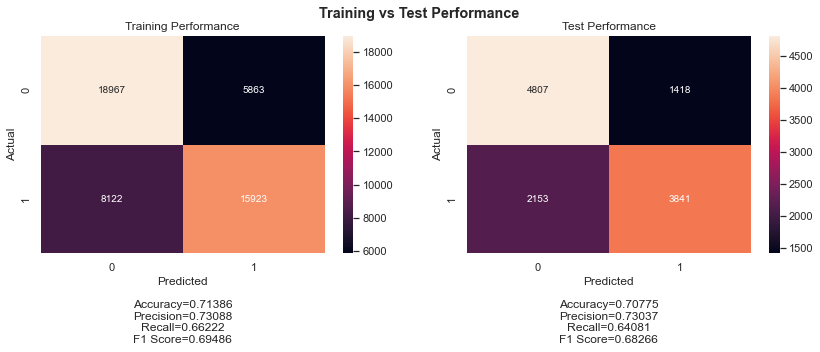

(0.7077502250593338,
 0.7303669899220384,
 0.6408074741408075,
 0.6826624011374746)

In [100]:
y_train_pred = final_cl.predict(X_train)
y_test_pred = final_cl.predict(X_test)

visualize_performance(y_train, y_train_pred, y_test, y_test_pred)

In [101]:
%store final_cl

Stored 'final_cl' (XGBClassifier)


### Observations

#### XGBoost before hyperparameter tuning
          | Accurracy  |  Precision  |   Recall     |  F1Score |
    ____________________________________________________________
     Train| 73.230%    |   74.890%   |   68.580%    | 71.596%  |
    ____________________________________________________________
     Test | 70.317%    |   72.150%   |   64.314%    | 68.007%  |
    ____________________________________________________________

#### Hyperparameter Tuning of XGBoost with GridSearchCV

         | Accurracy  |  Precision  |   Recall     |  F1Score |
    ____________________________________________________________
    Train| 71.386%    |   73.088%   |   66.222%    | 69.486%  |
    ____________________________________________________________
    Test | 70.775%    |   73.037%   |   64.081%    | 68.266%  |
    ____________________________________________________________


As XGBoost was the best model, we performed hyperparameter tuning on it to improve its accurracy.

We compare the results of XGBoost before and after the hyperparameter tuning. Although we used the XGBoost model and perform hyperparameter tuning the accuracy for the train model the accuracy for the test result improved by 0.4% while the train accuracy decreased to 71.386%.

The precision value does not change much differing by about 1%. The recall value seems to have reduced by an significant amount for both the test and train data. 

The F1Score for both are similar where the train for XGBoost was 71.6% and the train for XGBoost after hyperparameter tuning dropped to 69.5%. 
For the test value for F1Score, the value after hyperparameter turning increase by only 0.196% which is not very significant.

Although we used the XGBoost model and perform hyperparameter tuning, the accuracy for the train and test model did not change much. One learning point is that while tuning can help to achieve the optimal parameters, the difference may not very substantial.

Additionally, a possible reason for the lack of substantial improvement could be the dataset itself. Since all the models displayed relatively similar results, we can infer that the accuracy of the dataset is limited to only about 70% accuracy.